<font face="微软雅黑" size=4 color=#000000 >
2.XGBoost进行特征筛选


In [1]:
import numpy as np
import pandas as pd 
import xgboost as xgb
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import xgboost as xgb 

In [2]:
data = pd.read_csv(r'./dataset/pyramid/3.pyradics_new_balance.csv')

In [3]:
data.columns

Index(['NIHSS', 'diagnostics_Image-original_Maximum',
       'diagnostics_Mask-original_BoundingBox_1',
       'diagnostics_Mask-original_CenterOfMassIndex_1',
       'diagnostics_Mask-original_CenterOfMass_1',
       'diagnostics_Image-interpolated_Maximum',
       'diagnostics_Mask-interpolated_BoundingBox_2',
       'diagnostics_Mask-interpolated_CenterOfMass_1',
       'diagnostics_Mask-interpolated_Mean',
       'diagnostics_Mask-interpolated_Maximum',
       ...
       'wavelet-LLL_glrlm_GrayLevelVariance', 'wavelet-LLL_glrlm_RunEntropy',
       'wavelet-LLL_gldm_DependenceNonUniformityNormalized',
       'wavelet-LLL_gldm_LargeDependenceEmphasis',
       'wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_glszm_GrayLevelVariance',
       'wavelet-LLL_glszm_SmallAreaEmphasis',
       'wavelet-LLL_glszm_ZoneVariance'],
      dtype='object', leng

In [4]:
data['NIHSS'].value_counts()/len(data)

2    0.513011
0    0.408922
1    0.078067
Name: NIHSS, dtype: float64

In [5]:
data['NIHSS'].value_counts()

2    276
0    220
1     42
Name: NIHSS, dtype: int64

In [6]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split  # 切分训练集与测试集
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3333,random_state=1,stratify=y)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [8]:
params ={
        'booster':'gbtree',
        'objective':'multi:softmax',   # 多分类问题
        'num_class':3,  # 类别数，与multi softmax并用
        'gamma':0.1,    # 用于控制是否后剪枝的参数，越大越保守，一般0.1 0.2的样子
        'max_depth':12,  # 构建树的深度，越大越容易过拟合
        'lambda':2,  # 控制模型复杂度的权重值的L2 正则化项参数，参数越大，模型越不容易过拟合
        'subsample':0.7, # 随机采样训练样本
        'colsample_bytree':1,# 这个参数默认为1，是每个叶子里面h的和至少是多少
        # 对于正负样本不均衡时的0-1分类而言，假设h在0.01附近，min_child_weight为1
        #意味着叶子节点中最少需要包含100个样本。这个参数非常影响结果，
        # 控制叶子节点中二阶导的和的最小值，该参数值越小，越容易过拟合
        #'silent':0,  # 设置成1 则没有运行信息输入，最好是设置成0
        'eta':0.007,  # 如同学习率
        'seed':1000,
        'nthread':7,  #CPU线程数
        'eval_metric':'auc'
        }

bst = xgb.train(params, dtrain)

In [9]:
y_pred=bst.predict(dtest)

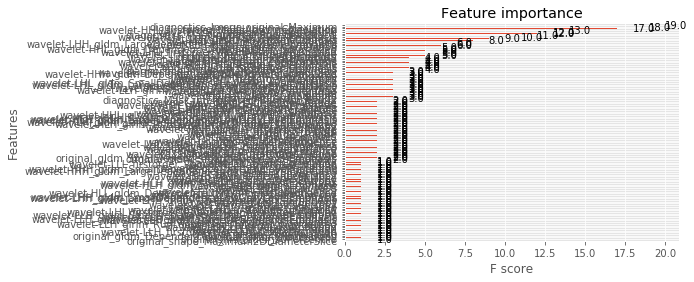

In [10]:
# 显示重要特征
xgb.plot_importance(bst)
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
#predictions = [round(value) for value in yprob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.11%


In [12]:
params ={'learning_rate': 0.4,
          'max_depth': 20,                # 构建树的深度，越大越容易过拟合
          'num_boost_round':2000,
          'objective': 'multi:softprob', # 多分类的问题
          'random_state': 7,
          'silent':0,
          'num_class':3,                 # 类别数，与 multisoftmax 并用
          'eta':0.8                      #为了防止过拟合，更新过程中用到的收缩步长。eta通过缩减特征 的权重使提升计算过程更加保守。缺省值为0.3，取值范围为：[0,1]
        }

Accuracy: 94.44%


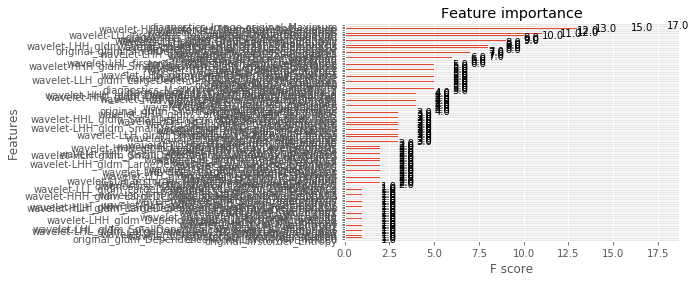

In [14]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

import xgboost as xgb
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
# load data
dataset = pd.read_csv(r'./dataset/pyradics_new_balance.csv')
# split data into X and y
X = dataset.iloc[:,1:]
Y = dataset.iloc[:,0]

# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

params ={ 'eval_metric':'auc',
          'learning_rate': 0.4,
          'max_depth': 20,                # 构建树的深度，越大越容易过拟合
#          'num_boost_round':2000,
          'objective': 'multi:softprob', # 多分类的问题
          'random_state': 7,
#          'silent':0,
          'num_class':3,                 # 类别数，与 multisoftmax 并用
          'eta':0.8                      #为了防止过拟合，更新过程中用到的收缩步长。eta通过缩减特征 的权重使提升计算过程更加保守。缺省值为0.3，取值范围为：[0,1]
        }
model = xgb.train(params,xgb.DMatrix(X_train, y_train))
y_pred=model.predict(xgb.DMatrix(X_test))

model.save_model('testXGboostClass.model')  # 保存训练模型

yprob = np.argmax(y_pred, axis=1)  # return the index of the biggest pro

predictions = [round(value) for value in yprob]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 显示重要特征
plot_importance(model)
plt.show()


In [21]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [22]:
dataset = pd.read_csv(r'./dataset/pyradics_new_balance.csv')
# split data into X and y
X = dataset.iloc[:,1:]
Y = dataset.iloc[:,0]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder =False)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.89%


In [24]:
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder =False)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=237, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=163, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=162, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=161, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=160, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=159, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=158, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=157, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=156, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=155, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=154, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=153, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=152, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=151, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=150, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=149, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=148, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=147, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=146, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=145, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=144, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=143, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=142, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=141, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=140, Accuracy: 88.76%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=139, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=138, Accuracy: 89.33%
Thresh=0.001, n=137, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=136, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=135, Accuracy: 91.57%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=134, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=133, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=132, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=131, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=130, Accuracy: 91.57%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=129, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=128, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=127, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=126, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=125, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=124, Accuracy: 88.76%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=123, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=122, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=121, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=120, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=119, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=118, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=117, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=116, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=115, Accuracy: 89.89%
Thresh=0.001, n=114, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=113, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=112, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=111, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=110, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=109, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=108, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.001, n=107, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.002, n=106, Accuracy: 89.89%
Thresh=0.002, n=105, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.002, n=104, Accuracy: 91.01%
Thresh=0.002, n=103, Accuracy: 89.89%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.002, n=102, Accuracy: 89.89%
Thresh=0.002, n=101, Accuracy: 90.45%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.002, n=100, Accuracy: 90.45%
Thresh=0.002, n=99, Accuracy: 90.45%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.002, n=98, Accuracy: 89.89%
Thresh=0.002, n=97, Accuracy: 91.57%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.002, n=96, Accuracy: 91.01%
Thresh=0.002, n=95, Accuracy: 91.57%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.002, n=94, Accuracy: 89.89%
Thresh=0.002, n=93, Accuracy: 89.89%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.002, n=92, Accuracy: 89.33%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.002, n=91, Accuracy: 91.01%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.003, n=90, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.003, n=89, Accuracy: 91.01%
Thresh=0.003, n=88, Accuracy: 91.01%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.003, n=87, Accuracy: 91.01%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.003, n=86, Accuracy: 91.57%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.

Thresh=0.003, n=85, Accuracy: 89.89%
Thresh=0.003, n=84, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.003, n=83, Accuracy: 90.45%
Thresh=0.003, n=82, Accuracy: 91.01%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.003, n=81, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.003, n=80, Accuracy: 89.33%
Thresh=0.003, n=79, Accuracy: 91.01%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.003, n=78, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.003, n=77, Accuracy: 90.45%
Thresh=0.003, n=76, Accuracy: 90.45%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.003, n=75, Accuracy: 91.01%
Thresh=0.004, n=74, Accuracy: 92.70%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.

Thresh=0.004, n=73, Accuracy: 91.57%
Thresh=0.004, n=72, Accuracy: 92.13%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.004, n=71, Accuracy: 91.57%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.004, n=70, Accuracy: 92.13%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.004, n=69, Accuracy: 93.26%
Thresh=0.004, n=68, Accuracy: 93.26%

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Thresh=0.004, n=67, Accuracy: 91.57%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.004, n=66, Accuracy: 90.45%
Thresh=0.005, n=65, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.

Thresh=0.005, n=64, Accuracy: 92.70%
Thresh=0.005, n=63, Accuracy: 88.76%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=62, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=61, Accuracy: 90.45%
Thresh=0.005, n=60, Accuracy: 91.01%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=59, Accuracy: 90.45%
Thresh=0.005, n=58, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=57, Accuracy: 91.01%
Thresh=0.005, n=56, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.006, n=55, Accuracy: 89.33%
Thresh=0.006, n=54, Accuracy: 88.76%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.

Thresh=0.006, n=53, Accuracy: 88.76%
Thresh=0.006, n=52, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.006, n=51, Accuracy: 88.76%
Thresh=0.006, n=50, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.006, n=49, Accuracy: 88.76%
Thresh=0.006, n=48, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=47, Accuracy: 89.33%
Thresh=0.007, n=46, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=45, Accuracy: 90.45%
Thresh=0.007, n=44, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=43, Accuracy: 90.45%
Thresh=0.008, n=42, Accuracy: 93.26%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.008, n=41, Accuracy: 93.82%
Thresh=0.008, n=40, Accuracy: 94.38%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.008, n=39, Accuracy: 93.26%
Thresh=0.008, n=38, Accuracy: 93.82%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=37, Accuracy: 92.70%
Thresh=0.009, n=36, Accuracy: 92.13%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=35, Accuracy: 92.70%
Thresh=0.010, n=34, Accuracy: 91.57%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.010, n=33, Accuracy: 91.57%
Thresh=0.010, n=32, Accuracy: 93.26%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.010, n=31, Accuracy: 89.33%
Thresh=0.010, n=30, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.011, n=29, Accuracy: 89.33%
Thresh=0.011, n=28, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.012, n=27, Accuracy: 89.33%
Thresh=0.012, n=26, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.

Thresh=0.012, n=25, Accuracy: 90.45%
Thresh=0.013, n=24, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.013, n=23, Accuracy: 88.76%
Thresh=0.013, n=22, Accuracy: 89.89%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.013, n=21, Accuracy: 89.33%
Thresh=0.013, n=20, Accuracy: 87.08%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.014, n=19, Accuracy: 89.33%
Thresh=0.014, n=18, Accuracy: 88.20%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=17, Accuracy: 91.01%
Thresh=0.015, n=16, Accuracy: 90.45%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=15, Accuracy: 89.33%
Thresh=0.016, n=14, Accuracy: 89.33%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.016, n=13, Accuracy: 85.96%
Thresh=0.016, n=12, Accuracy: 84.83%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.018, n=11, Accuracy: 85.96%
Thresh=0.019, n=10, Accuracy: 84.27%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.019, n=9, Accuracy: 84.27%
Thresh=0.020, n=8, Accuracy: 87.08%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.021, n=7, Accuracy: 87.08%
Thresh=0.021, n=6, Accuracy: 86.52%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.027, n=5, Accuracy: 84.27%
Thresh=0.037, n=4, Accuracy: 80.90%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.039, n=3, Accuracy: 79.78%
Thresh=0.048, n=2, Accuracy: 69.10%
Thresh=0.080, n=1, Accuracy: 53.93%


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [25]:
thresholds = sort(model.feature_importances_)
thresholds

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [26]:
result_select=model.feature_importances_
len(result_select)
test_list = np.array(result_select).reshape(1,237)

In [27]:
len(model.feature_importances_)

237

In [28]:
name=x.columns
name = np.array(name).reshape(237,1)
name

array([['diagnostics_Image-original_Maximum'],
       ['diagnostics_Mask-original_BoundingBox_1'],
       ['diagnostics_Mask-original_CenterOfMassIndex_1'],
       ['diagnostics_Mask-original_CenterOfMass_1'],
       ['diagnostics_Image-interpolated_Maximum'],
       ['diagnostics_Mask-interpolated_BoundingBox_2'],
       ['diagnostics_Mask-interpolated_CenterOfMass_1'],
       ['diagnostics_Mask-interpolated_Mean'],
       ['diagnostics_Mask-interpolated_Maximum'],
       ['original_shape_Elongation'],
       ['original_shape_MajorAxisLength'],
       ['original_shape_Maximum2DDiameterSlice'],
       ['original_shape_Maximum3DDiameter'],
       ['original_shape_Sphericity'],
       ['original_firstorder_90Percentile'],
       ['original_firstorder_Entropy'],
       ['original_firstorder_Maximum'],
       ['original_firstorder_Mean'],
       ['original_firstorder_Median'],
       ['original_firstorder_Range'],
       ['original_firstorder_RootMeanSquared'],
       ['original_firstorder